In [1]:
#TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras


#Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__) # tf version 2.2

2.2.0


In [2]:
# My Guess ---- fasion_mnist is a dataset that tf carries

fashion_mnist = keras.datasets.fashion_mnist


(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


#load data function returns a tuple of numpy array
#return (x_train, x_test), (y_train, y_test)



4423680/4422102 [==============================] - 0s 0us/step


In [0]:
#manually print out the class_names for each class it have

In [0]:
class_names = ['T-shirt/top', 'Trousers', 'Pullovers', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


*Explore the Data*

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
len(train_labels)

60000

In [7]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
test_images.shape

(10000, 28, 28)

In [9]:
len(test_labels)

10000

In [10]:
len(test_images)

10000

# Preprocess the data

In [11]:

plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

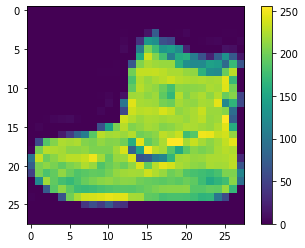

In [12]:
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Note here: the colorbar and the following plt function can only present if it is in the same block

In [0]:
# this step is to scale the values to be 0 < k < 1, 
# Note: it's important the the test and train images be preprocessed the same way
# Also note that the we convert to float point here, otherwise, everything would be .......0 or 1


# Q: float or double 


train_images = train_images / 255.0
test_images = test_images / 255.0

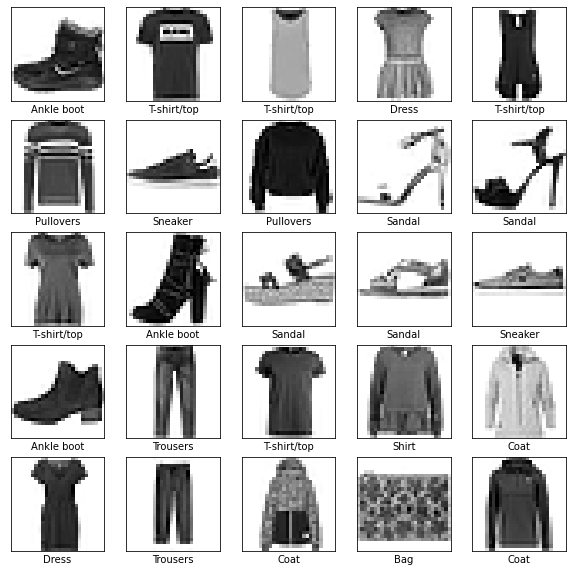

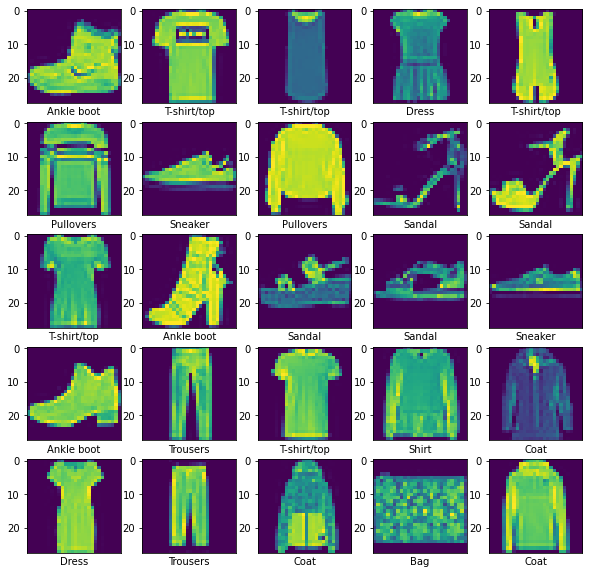

In [14]:
plt.figure(figsize=(10,10))

for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([]) # seems like to be the grid scale
  plt.yticks([]) # same too 
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary) # set the plt.cm to be binary is essentially black and white
  plt.xlabel(class_names[train_labels[i]])

plt.show()

plt.figure(figsize=(10,10))

for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.imshow(train_images[i])
  plt.xlabel(class_names[train_labels[i]])



# Build the model

In [0]:
#setup the layers


model = keras.Sequential([

# the first layer, Flatten
# transforms the format from a two-dimensional array to a one-dimensional array,
# line up the rows instead of stack up into a pic
                          keras.layers.Flatten(input_shape=(28,28)),

# Dense layer (Neural Network 向)
# a. Dense layer has 128 nodes, the second layer returns a logits 
# array with a length of 10. Each node contains a score that indicates the 
# current image belongs to one of the 10 classes.

                          keras.layers.Dense(128, activation='relu'),
                          keras.layers.Dense(10)
])




# compile the model

**Optimizer**- an update to the model based on the data and loss function

**Loss function**- measures the accruacy of the model during training


**Metrics** - to monitor the training and testing steps, the example uses *accuracy*, (the fraction which the images are correctly classified)


In [0]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


# Train the model

Steps


*   Feed the data. in this example, the training data is in the train_images and train_labels arrays
*   Let the model learn the connection between images and its labels
*   Make predictions on test set, (test_images array)
* Verify it's accracy by comparing it to the answer (test_labels array)


a. feed

In [0]:
model.fit(train_images, train_labels, epochs=10)

# result is around 91% accuray

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4956 - accuracy: 0.8251
Epoch 2/10
 524/1875 [=======>......................] - ETA: 2s - loss: 0.3894 - accuracy: 0.8578

b.Evaluate Accuracy

In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 1)

print('\nTest accuracy:', test_acc)


the result is less accurate than the training cases, the gap represent *overfitting* It happens when a ml model perfomrs worse on a new, unseen inputs


c. Make predictions

The model's linear outpus is logits, add a **softmax** layer for converting logits into probabilities, easeir to interpret

In [0]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [0]:
predictions = probability_model.predict(test_images)

In [0]:
# first prediction
predictions[0]

The prediction is an array of 10 numbers. They represent the model's "confidence" that the image correspoinds to each of the 10 diff *articles* of clothing. The **highest** is usually the result prediction value

In [0]:
np.argmax(predictions[0])


so here the prediction is 9


Let's graph to look at the full set of 10 class predictions


In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100*np.max(predictions_array),
                                       class_names[true_label]),
             color = color)
  
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])

  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

d. Verify predictions


Let's look at the 0th image

In [0]:
i = 0
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1, 2, 2, )
plot_value_array(i, predictions[i], test_labels)
plt.show()

In [0]:
i = 12
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

In [0]:
# Plot the first X test images, their predicted labels, and the true label 
# Color correct predictions in blue and incorrect predictions in red

num_row = 5
num_cols = 3
num_images = num_row*num_cols
plt.figure(figsize=(2*2*num_cols, 2 * num_row))

for i in range(num_images):
  # first the test_image
  plt.subplot(num_row, 2* num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)

  # second is the probability bar plot
  plt.subplot(num_row, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)

plt.tight_layout()
plt.show() 

# Use the trained model

In [0]:
#Grab an image from the test dataset
img = test_images[1]

print(img.shape)

In [0]:
# Add the image to a batch where it's the only member

img = (np.expand_dims(img, 0))

print(img.shape)

In [0]:
predictions_single = probability_model.predict(img)

print(predictions_single)

In [0]:
plot_value_array(1, predictions_single[0], test_labels) 

# _ tuple ???? wtf the grammar is ?
_ = plt.xticks(range(10), class_names, rotation = 45)



In [0]:
np.argmax(predictions_single[0])